V přiloženém excelu máte dvě tabulky. Jedna představuje transakce (objednávky), které proběhly v E-shopu. Druhá představuje databázi produktů v E-shopu.
Ke všem otázkám níže prosím popisujte i postup, jak jste k danému závěru došli. Pro analýzu a prezentaci výsledků využijte nástroje dle vaší volby.
Manager E-shopu se ptá:
1.	Na jaké kategorii produktů máme největší obrat? Mění se na tom v jednotlivých měsících něco?
2.	Který den v týdnu je nejsilnější na počet objednávek?
3.	Od 18. 3. 2022 došlo k navýšení budgetu na online marketingových platformách (Google Ads, Sklik, Facebook). Ovlivnilo to nějak prodeje? A pokud ano, tak jak? (externí vlivy zanedbejme)

Pokud něco ze zadání není jasné, tak se neváhejte zeptat.


import packages:

In [1]:
import matplotlib.pyplot as plt # for plotting
import numpy as np # maybe not needed
import pandas as pd # for dataframes
from datetime import datetime # for format conversion
from datetime import date # for days of the week
import calendar # for month names

specify input .csv files:

In [2]:
input_products = "./produkty.csv"
input_transactions = "./transakce.csv"

read product .csv file into a dataframe:

In [3]:
products_DF = pd.read_csv(input_products,sep = ";")
#products_DF

read transaction .csv file into a dataframe:

In [4]:
transactions_DF = pd.read_csv(input_transactions, sep = ";")
#transactions_DF

create a copy beacause we will alter the dataframe next and keeping it the same way might be helpful:

In [5]:
money_transactions_DF = transactions_DF.copy()

merging the two dataframes, thus adding Category and Price to transactions:

In [6]:
money_transactions_DF = money_transactions_DF.merge(products_DF, how="inner", on="Product name")

out of Quantity and Price we can then calculate total paid amount:

In [7]:
money_transactions_DF["Paid amount"] = money_transactions_DF["Price"]*money_transactions_DF["Quantity"]

# Task 1:

sorting the values by date:

In [8]:
money_transactions_DF["Date"] = pd.to_datetime(money_transactions_DF["Date"], format="%d.%m.%Y")
money_transactions_DF.sort_values(by="Date")


,Transaction ID,Date,Product name,Quantity,Category,Price,Paid amount
0,1,2022-02-01,Samsung QN55Q80T,1,Televize,29990,29990
10,1,2022-02-01,Apple iPhone 12 Pro,1,Mobilní telefony,27990,27990
30,2,2022-02-02,Xiaomi Poco X3 Pro,1,Mobilní telefony,5690,5690
20,2,2022-02-02,Lenovo Tab P11 Pro,2,Tablety,11990,23980
44,3,2022-02-03,Bose QuietComfort Earbuds,2,Audio,7490,14980
...,...,...,...,...,...,...,...
118,77,2022-05-27,Samsung Galaxy Tab S7+,1,Tablety,24990,24990
140,77,2022-05-27,LG 75NANO81,1,Televize,44990,44990
83,78,2022-05-29,LG OLED55CX,1,Televize,38990,38990
59,78,2022-05-29,Bose QuietComfort Earbuds,2,Audio,7490,14980


summing the paid amounts by category:

In [9]:
total_made_by_category_DF = money_transactions_DF.groupby("Category")["Paid amount"].sum()
total_made_by_category_DF

Category
Audio                416370
Mobilní telefony     614460
Tablety              623660
Televize            1205680
Name: Paid amount, dtype: int64

Plotting the results:

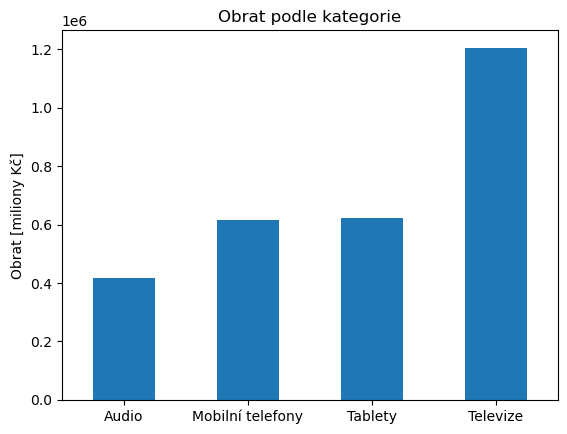

In [10]:
total_made_by_category_DF.plot.bar()

plt.xlabel(None)
plt.ylabel("Obrat [miliony Kč]")
plt.title("Obrat podle kategorie")
plt.xticks(rotation = 0)
plt.savefig("total_turnover_by_category.png")
plt.show()

add day of week column to our dataframe:

In [11]:
money_transactions_DF["Day of week"] = money_transactions_DF["Date"].dt.day_name()
money_transactions_DF.sort_values(by="Date")

,Transaction ID,Date,Product name,Quantity,Category,Price,Paid amount,Day of week
0,1,2022-02-01,Samsung QN55Q80T,1,Televize,29990,29990,Tuesday
10,1,2022-02-01,Apple iPhone 12 Pro,1,Mobilní telefony,27990,27990,Tuesday
30,2,2022-02-02,Xiaomi Poco X3 Pro,1,Mobilní telefony,5690,5690,Wednesday
20,2,2022-02-02,Lenovo Tab P11 Pro,2,Tablety,11990,23980,Wednesday
44,3,2022-02-03,Bose QuietComfort Earbuds,2,Audio,7490,14980,Thursday
...,...,...,...,...,...,...,...,...
118,77,2022-05-27,Samsung Galaxy Tab S7+,1,Tablety,24990,24990,Friday
140,77,2022-05-27,LG 75NANO81,1,Televize,44990,44990,Friday
83,78,2022-05-29,LG OLED55CX,1,Televize,38990,38990,Sunday
59,78,2022-05-29,Bose QuietComfort Earbuds,2,Audio,7490,14980,Sunday


add the name of the month we will use this later to analyse by month - this approach is safe since our data do not span across multiple years:

In [12]:
money_transactions_DF["Month"] = money_transactions_DF["Date"].dt.month_name()
money_transactions_DF = money_transactions_DF.sort_values(by="Date")
money_transactions_DF

,Transaction ID,Date,Product name,Quantity,Category,Price,Paid amount,Day of week,Month
0,1,2022-02-01,Samsung QN55Q80T,1,Televize,29990,29990,Tuesday,February
10,1,2022-02-01,Apple iPhone 12 Pro,1,Mobilní telefony,27990,27990,Tuesday,February
30,2,2022-02-02,Xiaomi Poco X3 Pro,1,Mobilní telefony,5690,5690,Wednesday,February
20,2,2022-02-02,Lenovo Tab P11 Pro,2,Tablety,11990,23980,Wednesday,February
44,3,2022-02-03,Bose QuietComfort Earbuds,2,Audio,7490,14980,Thursday,February
...,...,...,...,...,...,...,...,...,...
118,77,2022-05-27,Samsung Galaxy Tab S7+,1,Tablety,24990,24990,Friday,May
140,77,2022-05-27,LG 75NANO81,1,Televize,44990,44990,Friday,May
83,78,2022-05-29,LG OLED55CX,1,Televize,38990,38990,Sunday,May
59,78,2022-05-29,Bose QuietComfort Earbuds,2,Audio,7490,14980,Sunday,May


get the information about monthly amount of money by category (by pivoting the table):

In [13]:
# Get the unique months in the original order
month_order = money_transactions_DF['Month'].unique()

# Convert 'month' column to Categorical data type with the specified order
money_transactions_DF['Month'] = pd.Categorical(money_transactions_DF['Month'], categories=month_order, ordered=True)

# Create a pivot table to calculate the total amount for each category and month combination
pivot_df = money_transactions_DF.pivot_table(values='Paid amount', index='Category', columns='Month', aggfunc='sum')

check whether the table pivoted correctly:

In [14]:
pivot_df

Month,February,March,April,May
Category,,,,
Audio,130310,107820,107840,70400
Mobilní telefony,208690,157710,177510,70550
Tablety,188890,164910,171910,97950
Televize,290920,380900,266930,266930


Plot as barplots for every month (a bit less concentrated of a plot but easy to spot mistakes in):
((not used in the final report -- just for myself))

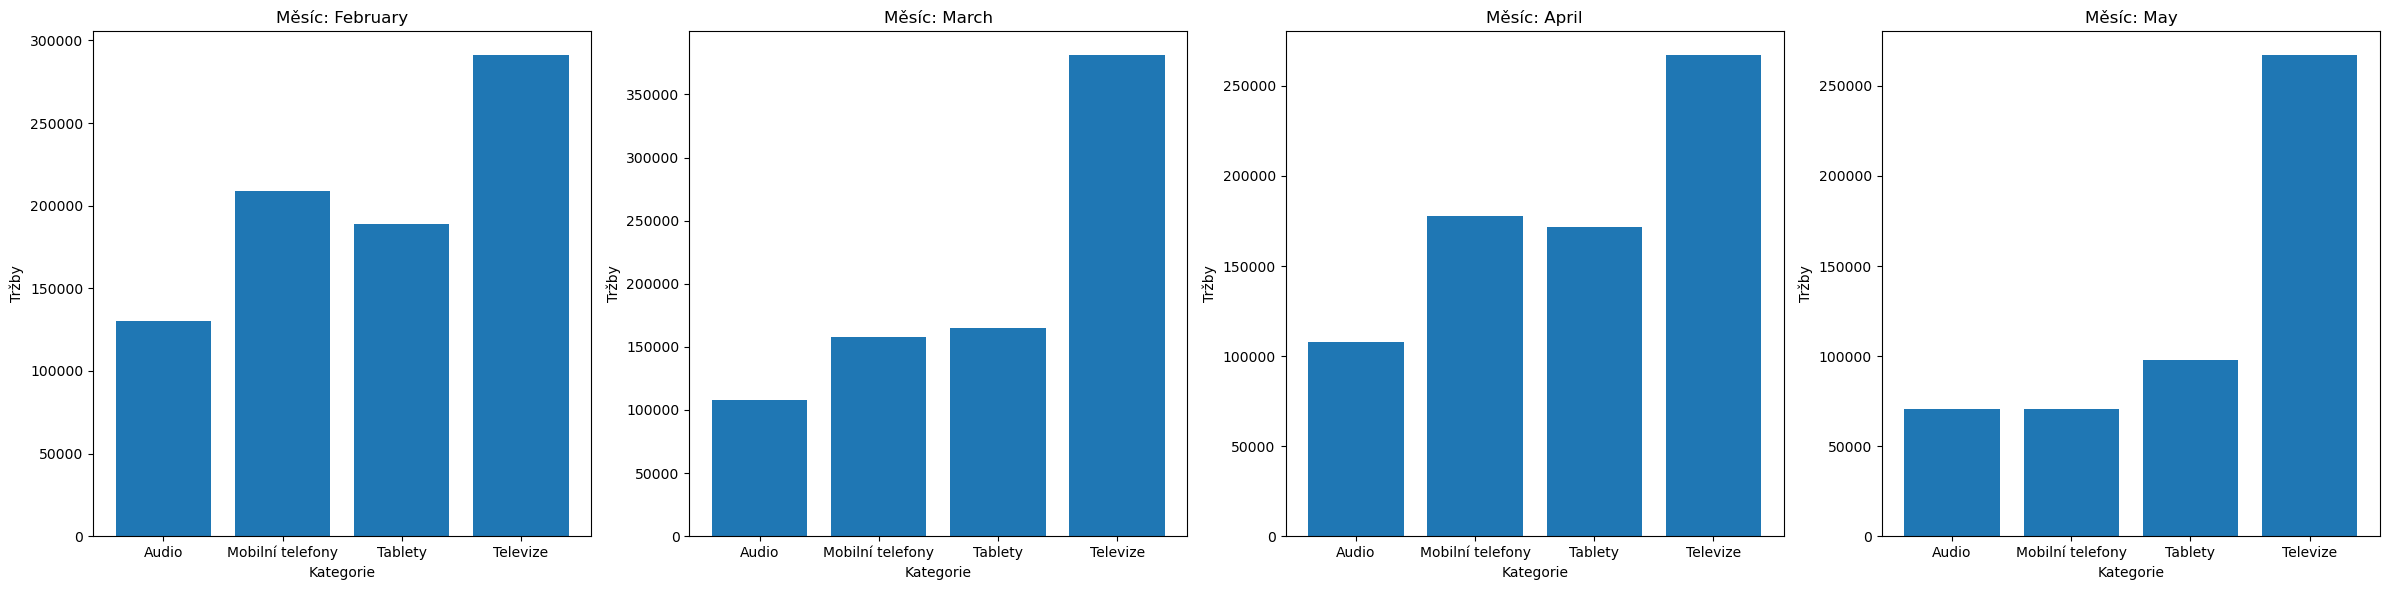

In [15]:
# Create subplots
fig, axes = plt.subplots(ncols=len(pivot_df.columns), figsize=(6 * len(pivot_df.columns), 6))

# Iterate over each month
for i, month in enumerate(pivot_df.columns):
    # Plot a bar plot for each category
    axes[i].bar(pivot_df.index, pivot_df[month])
    axes[i].set_xlabel('Kategorie')
    axes[i].set_ylabel('Tržby')
    axes[i].set_title(f'Měsíc: {month}')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

plot a time-dependent plot for each category:

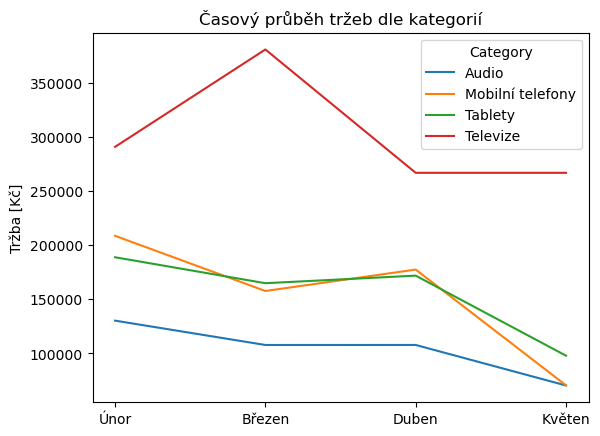

In [16]:
month_names = [
    'January',
    'February',
    'March',
    'April',
    'May',
    'June',
    'July',
    'August',
    'September',
    'October',
    'November',
    'December'
    ]
month_names_to_CZ = {
   'January':"Leden",
    'February':"Únor",
    'March':"Březen",
    'April':"Duben",
    'May':"Květen",
    'June':"Červen",
    'July':"Červenec",
    'August':"Srpen",
    'September':"Září",
    'October':"Říjen",
    'November':"Listopad",
    'December':"Prosinec"
    }


# Transpose the pivot DataFrame # so that months end up on the x-axis and not in the datelines
transposed_df = pivot_df.T

# collect month names and translate them to CZ
month_names_CZ = []
months = transposed_df.index
for month in months:
    month_names_CZ.append(month_names_to_CZ[month])

# Convert 'Month' column to categorical data type with specified order
transposed_df.index = pd.Categorical(transposed_df.index, categories=month_names, ordered=True)

# Sort the DataFrame by the 'Month' index
transposed_df.sort_index(inplace=True)

# Plot the timeline
transposed_df.plot(kind='line')

# Set the labels and title
plt.xlabel(None)
plt.ylabel('Tržba [Kč]')
plt.title('Časový průběh tržeb dle kategorií')
plt.xticks(range(len(months)), month_names_CZ)

# Show the plot
plt.savefig("monthly_turnover_by_category.png")
plt.show()

# Task 2:

get a DFgroupby object of transactions grouped by transaction ID:

In [17]:
transactions_grouped_by_tID_DFgb = money_transactions_DF.groupby("Transaction ID")

plot the counts of transactions by day (using a bar plot):

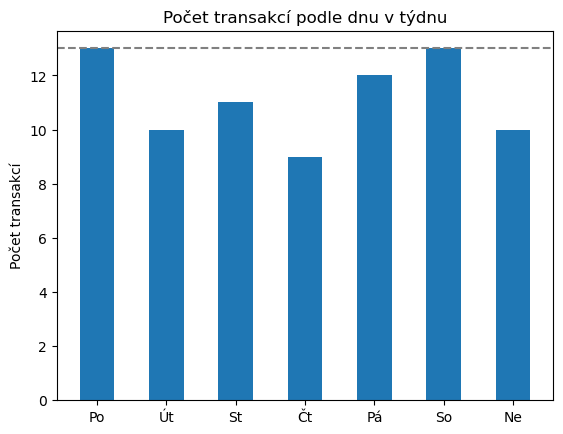

In [18]:
list_of_transactions_by_days = [] # initialize container

#prepare a list of days where one record i.e.: "Monday" means a transaction occured that day
# in other words: from every group (transaction) enlist one dayname representing the transaction
for ID, group in transactions_grouped_by_tID_DFgb:
    #print(f"ID: {ID}")
    #print(group["Day of week"].unique())
    #print("*****")
    list_of_transactions_by_days.append(str(group["Day of week"].unique()[0]))#ensure we count only once per tID
    
#print(list_of_transactions_by_days)


#used for plotting in CZ:
day_names = [         
        'Monday',         
        'Tuesday',         
        'Wednesday',         
        'Thursday',         
        'Friday',         
        'Saturday',
        'Sunday',    
        ]
day_names_to_CZ = {         
        'Monday':"Po",         
        'Tuesday':"Út",         
        'Wednesday':"St",         
        'Thursday':"Čt",         
        'Friday':"Pá",         
        'Saturday':"So",
        'Sunday':"Ne", 
        }

# convert through a dictionary:
day_names_CZ = []
for day in day_names:
    day_names_CZ.append(day_names_to_CZ[day])

# count the occurences of each dayname:
counts_for_days_of_week = []
for day in day_names:
    # print(f"{day}:",list_of_transactions_by_days.count(day))
    counts_for_days_of_week.append(list_of_transactions_by_days.count(day))

# identify maximum value of counts for a more readable barplot:
maximum = max(counts_for_days_of_week)

# plot the barplot:
plt.bar(day_names_CZ,counts_for_days_of_week, width=0.5)
plt.axhline(maximum, linestyle = "--", color = "grey" )
plt.ylabel("Počet transakcí")
plt.title("Počet transakcí podle dnu v týdnu")

plt.savefig("transactions_by_dayname.png")
plt.show()

### alternative metric: 

count of sold products i.e.: 2 iPhones in the same transaction count as one but a samsung phone and an iphone in one transaction count as two (probably not what is meant by the question in the instructions)

In [19]:
series_2 = money_transactions_DF.groupby("Day of week")["Transaction ID"].count().loc[day_names]
series_2
maximum_2 = max(series_2)

Text(0, 0.5, 'Počet prodaných produktů')

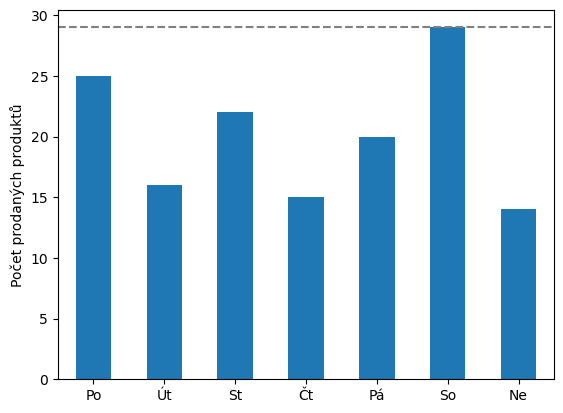

In [20]:
series_2.plot.bar()
plt.axhline(maximum_2, linestyle="--", color="gray")
plt.xticks(range(len(series_2.index)),day_names_CZ, rotation=0 )
plt.xlabel(None)
plt.ylabel("Počet prodaných produktů")

### alternative metric 2: 

count of sold pieces i.e.: 2 iPhones in the same transaction count as two. A samsung phone and an iphone in one transaction count as two as well (probably not what is meant by the question in the instructions).

In [21]:
series_3 = money_transactions_DF.groupby("Day of week")["Quantity"].sum()
series_3

Day of week
Friday       22
Monday       29
Saturday     31
Sunday       18
Thursday     19
Tuesday      18
Wednesday    26
Name: Quantity, dtype: int64

In [22]:
sorted_series_3 = series_3.loc[day_names]
maximum_3 = max(sorted_series_3)

Plot the barplot:

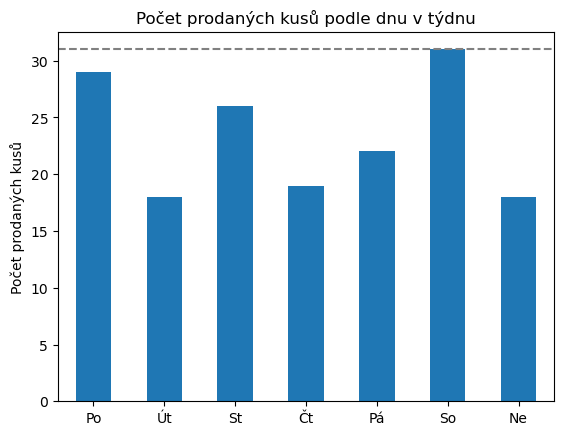

In [23]:
sorted_series_3.plot.bar()
plt.axhline(maximum_3, linestyle = "--", color = "gray") # the maximum line - easier to read
plt.xticks(range(len(sorted_series_3.index)),day_names_CZ, rotation=0)
plt.xlabel(None)
plt.ylabel("Počet prodaných kusů")
plt.title("Počet prodaných kusů podle dnu v týdnu")
plt.savefig("sold_pieces_by_dayname.png")
plt.show()

In [24]:
sorted_money_transactions_DF = money_transactions_DF.sort_values(by="Date")

# Task 3:

In [25]:
slicing_date = "2022-03-18" # the day we increased budget on e-marketing tools

Slice the table in half: (the date of the change is regarded as "before the change")

In [26]:
money_before_date = sorted_money_transactions_DF[sorted_money_transactions_DF["Date"] <= slicing_date]
money_before_date # inspect the table

,Transaction ID,Date,Product name,Quantity,Category,Price,Paid amount,Day of week,Month
0,1,2022-02-01,Samsung QN55Q80T,1,Televize,29990,29990,Tuesday,February
10,1,2022-02-01,Apple iPhone 12 Pro,1,Mobilní telefony,27990,27990,Tuesday,February
30,2,2022-02-02,Xiaomi Poco X3 Pro,1,Mobilní telefony,5690,5690,Wednesday,February
20,2,2022-02-02,Lenovo Tab P11 Pro,2,Tablety,11990,23980,Wednesday,February
44,3,2022-02-03,Bose QuietComfort Earbuds,2,Audio,7490,14980,Thursday,February
...,...,...,...,...,...,...,...,...,...
101,44,2022-03-16,Apple iPad Air,1,Tablety,17990,17990,Wednesday,March
125,45,2022-03-17,Sony WH-1000XM4,1,Audio,10490,10490,Thursday,March
4,45,2022-03-17,Samsung QN55Q80T,1,Televize,29990,29990,Thursday,March
136,46,2022-03-18,LG 75NANO81,1,Televize,44990,44990,Friday,March


count the number of days before the change occured:

In [27]:
number_of_days_before = (money_before_date["Date"].iat[-1] - money_before_date["Date"][0]).days
#print(number_of_days_before) # inspect the number

get the table for the days after the change:

In [28]:
money_after_date = sorted_money_transactions_DF[sorted_money_transactions_DF["Date"] > slicing_date]
money_after_date # to inspect the table

,Transaction ID,Date,Product name,Quantity,Category,Price,Paid amount,Day of week,Month
112,47,2022-03-19,Samsung Galaxy Tab S7+,1,Tablety,24990,24990,Saturday,March
51,48,2022-03-20,Bose QuietComfort Earbuds,2,Audio,7490,14980,Sunday,March
14,49,2022-03-21,Apple iPhone 12 Pro,1,Mobilní telefony,27990,27990,Monday,March
76,50,2022-03-22,LG OLED55CX,1,Televize,38990,38990,Tuesday,March
90,50,2022-03-22,JBL Charge 4,1,Audio,2990,2990,Tuesday,March
...,...,...,...,...,...,...,...,...,...
118,77,2022-05-27,Samsung Galaxy Tab S7+,1,Tablety,24990,24990,Friday,May
140,77,2022-05-27,LG 75NANO81,1,Televize,44990,44990,Friday,May
59,78,2022-05-29,Bose QuietComfort Earbuds,2,Audio,7490,14980,Sunday,May
83,78,2022-05-29,LG OLED55CX,1,Televize,38990,38990,Sunday,May


In [29]:
#get the number of days after the change:

In [30]:
number_of_days_after = (money_after_date["Date"].iat[-1] - money_after_date["Date"].iat[0]).days
#print(number_of_days_after+number_of_days_before,(sorted_money_transactions_DF["Date"].iat[-1] - sorted_money_transactions_DF["Date"].iat[0]).days)

In [31]:
# sum the money before change

In [32]:
total_money_before = money_before_date["Paid amount"].sum()
#print(total_money_before)

In [33]:
# divide by the number of days -- effectively averaging it

In [34]:
total_money_before_per_day = total_money_before/number_of_days_before

In [35]:
# sum the money after change

In [36]:
total_money_after = money_after_date["Paid amount"].sum()
#print(total_money_after)

In [37]:
# divide by the number of days -- effectively averaging it

In [38]:
total_money_after_per_day = total_money_after/number_of_days_after

printcheck the results ofo the averages:

In [39]:
print(f"money before per day: {round(total_money_before_per_day)}, money after per day {round(total_money_after_per_day)}")

money before per day: 29370, money after per day 21669


create a pandas series for filling in the dates where no bussiness was done and then plotting:

In [40]:
series = sorted_money_transactions_DF.groupby("Date")["Paid amount"].sum()

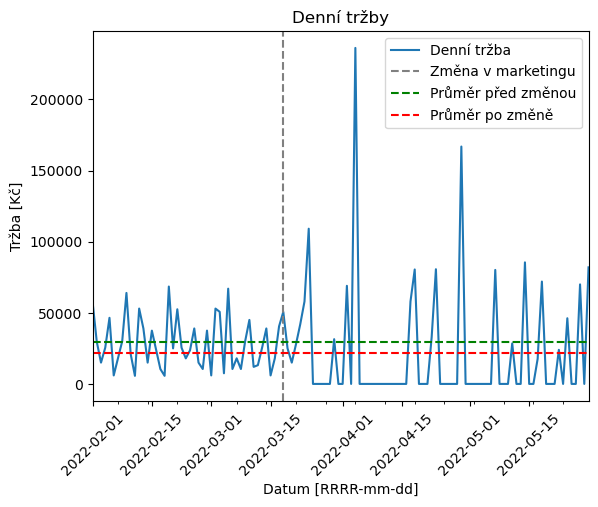

In [41]:
import matplotlib.dates as mdates # something for date format handling

# Convert the index to a datetime type
series.index = pd.to_datetime(series.index)

# Create a complete date sequence using a specified frequency (e.g., daily)
complete_date_sequence = pd.date_range(start=series.index.min(), end=series.index.max(), freq='D')

# Reindex the series with the complete date sequence and fill missing values with 0
series = series.reindex(complete_date_sequence, fill_value=0)

# Plot the line plot
fig, ax = plt.subplots()
series.plot(kind='line', label='Denní tržba', ax=ax)

# Set the labels and title
plt.xlabel('Datum [RRRR-mm-dd]')
plt.ylabel('Tržba [Kč]')
plt.title('Denní tržby')


# additional lines:
plt.axvline(slicing_date, linestyle="--", color="gray", label="Změna v marketingu") #date of change indicator
plt.axhline(total_money_before_per_day, xmax=3, linestyle="--", color="green", label="Průměr před změnou")# avg before
plt.axhline(total_money_after_per_day, linestyle="--", color="red", label="Průměr po změně") # avg after

# Format x-axis ticks to display only the first day and fifteenth day of each month with complete date
ax.xaxis.set_major_locator(mdates.DayLocator(bymonthday=[1, 15]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# show the legend
plt.legend()
# rotate ticklabels:
plt.xticks(rotation=45)


# plot
plt.savefig("daily_turnover_with_change.png")
plt.show()


create two series to calculate t-test on

In [42]:
# Convert the index to a datetime type
series.index = pd.to_datetime(series.index)

# Split the series into before and after based on the splitting date
before_series = series[series.index <= slicing_date]
after_series = series[series.index > slicing_date]


calculate the t-test

In [43]:
from scipy.stats import ttest_ind

# Perform an independent t-test
t_statistic, p_value = ttest_ind(before_series, after_series, equal_var=False)

# Print the t-statistic and p-value
print("t-statistic:", t_statistic)
print("p-value:", p_value)


t-statistic: 1.2984989828082845
p-value: 0.19697025452509342


some basic auto-evaluation:

In [44]:
if p_value<=0.05:
    print("The difference is significant!")
else:
    print("The difference is NOT statistically significant!")
        

The difference is NOT statistically significant!
